<a href="https://colab.research.google.com/github/farayjtd/FP_KecerdasanBuatanLanjut/blob/main/BI_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALL LIBRARY**

In [1]:
!pip install -q datasets tensorflow scikit-learn seaborn

**IMPORT LIBRARY**

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping

**LOAD DATASET**

In [3]:
ds = load_dataset("KagChi/indonesian-gambling-words")

train_df = pd.DataFrame(ds['train'])
test_df  = pd.DataFrame(ds['test'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/47 [00:00<?, ?it/s]

ED3Uzfzz32I.csv: 0.00B [00:00, ?B/s]

2dQC4Cu5uaw.csv: 0.00B [00:00, ?B/s]

474VPvx-Nco.csv: 0.00B [00:00, ?B/s]

9GTXmSz0mUc.csv: 0.00B [00:00, ?B/s]

sXyUIQtPhF8.csv: 0.00B [00:00, ?B/s]

WDZ5kjfJg8s.csv: 0.00B [00:00, ?B/s]

bScj0SPgaI4.csv: 0.00B [00:00, ?B/s]

e2xtW3Q8WW0.csv: 0.00B [00:00, ?B/s]

ysYyVWuWJ8c.csv: 0.00B [00:00, ?B/s]

4BohSmZ9S4M.csv: 0.00B [00:00, ?B/s]

TCPtml7TSpQ.csv: 0.00B [00:00, ?B/s]

CmpCziLna-k.csv: 0.00B [00:00, ?B/s]

n98vqSUIfJs.csv: 0.00B [00:00, ?B/s]

Eur6uaGvVuA.csv: 0.00B [00:00, ?B/s]

8Ots7wzHNUs.csv: 0.00B [00:00, ?B/s]

m_WJwin9_UE.csv: 0.00B [00:00, ?B/s]

0o-EkTXJAP4.csv: 0.00B [00:00, ?B/s]

AChQb6ORYag.csv: 0.00B [00:00, ?B/s]

wRN0hesdHIU.csv: 0.00B [00:00, ?B/s]

hNK9FmZrFpw.csv: 0.00B [00:00, ?B/s]

ZuM53LohU-0.csv: 0.00B [00:00, ?B/s]

UEz9EQZZTus.csv: 0.00B [00:00, ?B/s]

NVfxPC5xIRc.csv: 0.00B [00:00, ?B/s]

RrFrszO1ygo.csv: 0.00B [00:00, ?B/s]

m09097HiiOw.csv: 0.00B [00:00, ?B/s]

w6j-4CiuxoE.csv: 0.00B [00:00, ?B/s]

aQPC-Rs5opc.csv: 0.00B [00:00, ?B/s]

fCrOtPVrSvM.csv: 0.00B [00:00, ?B/s]

FED9_pePJhU.csv: 0.00B [00:00, ?B/s]

8luG4Q0XIgc.csv: 0.00B [00:00, ?B/s]

JOWclYWhJNE.csv: 0.00B [00:00, ?B/s]

BeRyR9idDAc.csv: 0.00B [00:00, ?B/s]

pz6XL7BzuBw.csv: 0.00B [00:00, ?B/s]

Fib2wschf2k.csv: 0.00B [00:00, ?B/s]

bA4sIBhR5Aw.csv: 0.00B [00:00, ?B/s]

RIsk4avAlvA.csv: 0.00B [00:00, ?B/s]

rosTeoC3tBs.csv: 0.00B [00:00, ?B/s]

QAcR8pnaSXY.csv: 0.00B [00:00, ?B/s]

h6duaKrrSbI.csv: 0.00B [00:00, ?B/s]

hSR7KNaO1Gk.csv: 0.00B [00:00, ?B/s]

9eheKdCIzJ4.csv: 0.00B [00:00, ?B/s]

E8dybCrQv5o.csv: 0.00B [00:00, ?B/s]

J4UD6FdOA9Q.csv: 0.00B [00:00, ?B/s]

8ExtLVUh5nc.csv: 0.00B [00:00, ?B/s]

jD6BMhQEcXM.csv: 0.00B [00:00, ?B/s]

zqmKbVtAPM0.csv: 0.00B [00:00, ?B/s]

sg8Mzx0fZbU.csv: 0.00B [00:00, ?B/s]

3MZfQhthBmM.csv: 0.00B [00:00, ?B/s]

9F7yc8OT3SM.csv: 0.00B [00:00, ?B/s]

vCm1KeklKLI.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/155175 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11391 [00:00<?, ? examples/s]

**BALANCING DATA**

In [4]:
train_judol = train_df[train_df['label'] == 1].sample(20000, random_state=42)
train_non   = train_df[train_df['label'] == 0].sample(20000, random_state=42)
train_balanced = pd.concat([train_judol, train_non]).sample(frac=1, random_state=42)

test_judol = test_df[test_df['label'] == 1].sample(4500, random_state=42)
test_non   = test_df[test_df['label'] == 0].sample(4500, random_state=42)
test_balanced = pd.concat([test_judol, test_non]).sample(frac=1, random_state=42)

**KAMUS NORMALISASI JUDOL**

In [5]:
JUDOL_DICT = {
    "g4cor": "gacor",
    "gac0r": "gacor",
    "g@cor": "gacor",
    "gacorrr": "gacor",

    "sl0t": "slot",
    "s10t": "slot",
    "slotzz": "slot",

    "jp": "jackpot",
    "wd": "withdraw",
    "depo": "deposit",
    "maxwin": "maxwin"
}

**FUNGSI PREPROCESSING**

In [6]:
def normalize_char(text):
    return (
        text.replace('0','o')
            .replace('1','i')
            .replace('3','e')
            .replace('4','a')
            .replace('@','a')
            .replace('$','s')
    )

def remove_repeated_chars(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

def apply_judol_dict(text):
    return " ".join([JUDOL_DICT.get(w, w) for w in text.split()])

**CLEAN TEXT BERDASARKAN LABEL**

In [7]:
def clean_text_by_label(text, label):
    if text is None:
        return ""

    text = text.lower()

    # Normalisasi hanya untuk teks Judol
    if label == 1:
        text = normalize_char(text)

    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = remove_repeated_chars(text)
    text = re.sub(r'\s+', ' ', text).strip()

    if label == 1:
        text = apply_judol_dict(text)

    return text

**PREPROCESSING**

In [8]:
train_balanced['clean_text'] = train_balanced.apply(
    lambda row: clean_text_by_label(row['text'], row['label']),
    axis=1
)

test_balanced['clean_text'] = test_balanced.apply(
    lambda row: clean_text_by_label(row['text'], row['label']),
    axis=1
)

**TOKENISASI & PADDING**

In [9]:
max_words = 30000
max_len   = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_balanced['clean_text'])

X_train = tokenizer.texts_to_sequences(train_balanced['clean_text'])
X_test  = tokenizer.texts_to_sequences(test_balanced['clean_text'])

X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test  = pad_sequences(X_test, maxlen=max_len, padding='post')

y_train = train_balanced['label'].values
y_test  = test_balanced['label'].values

**MODEL BI-GRU**

In [10]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(max_words, 128),
    Bidirectional(GRU(128)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       198,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,038,401 (15.41 MB)

 Trainable params: 4,038,401 (15.41 MB)

 Non-trainable params: 0 (0.00 B)

**TRAINING**

In [11]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

In [12]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8548 - loss: 0.3503 - val_accuracy: 0.9695 - val_loss: 0.0982
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9764 - loss: 0.0728 - val_accuracy: 0.9686 - val_loss: 0.0954
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9839 - loss: 0.0472 - val_accuracy: 0.9718 - val_loss: 0.0903
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9874 - loss: 0.0326 - val_accuracy: 0.9720 - val_loss: 0.0921
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9892 - loss: 0.0276 - val_accuracy: 0.9734 - val_loss: 0.0992
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9895 - loss: 0.0264 - val_accuracy: 0.9686 - val_loss: 0.1095
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


**EVALUASI MODEL**

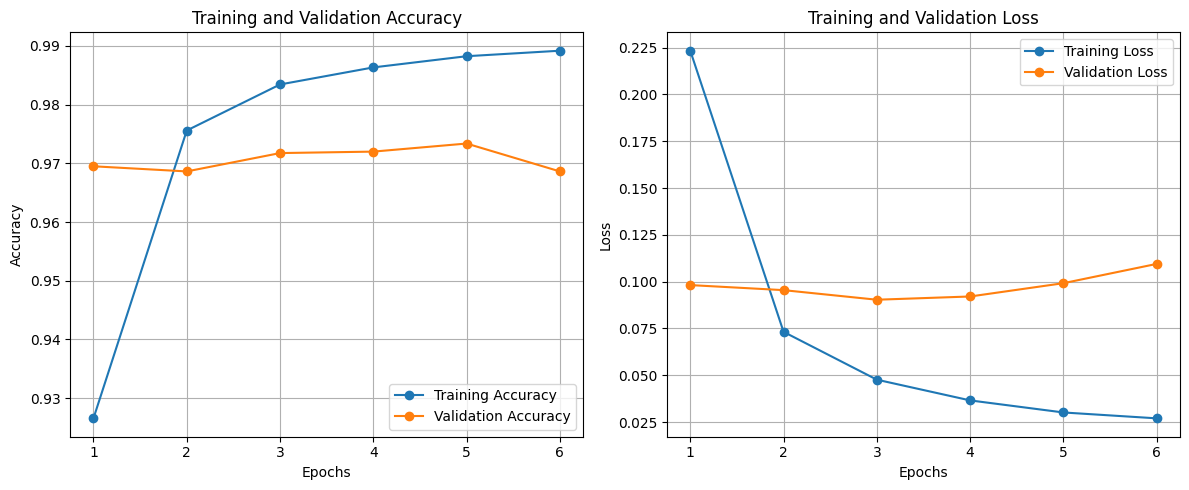

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy : 0.9413
Precision: 0.9125
Recall   : 0.9762
F1-score : 0.9433


**CLASSIFICATION REPORT**

In [15]:
print(classification_report(
    y_test,
    y_pred,
    target_names=["Non Judol", "Judol"]
))

              precision    recall  f1-score   support

   Non Judol       0.97      0.91      0.94      4500
       Judol       0.91      0.98      0.94      4500

    accuracy                           0.94      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.94      0.94      0.94      9000



**CONFUSION MATRIX**

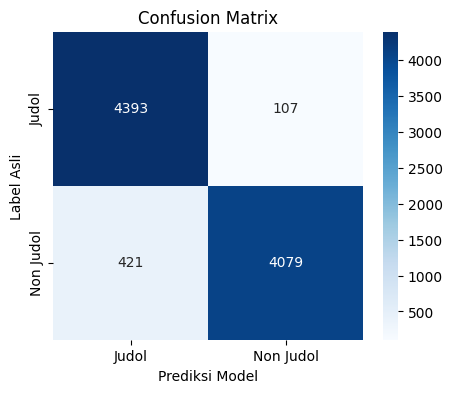

In [16]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Judol", "Non Judol"],
    yticklabels=["Judol", "Non Judol"]
)
plt.xlabel("Prediksi Model")
plt.ylabel("Label Asli")
plt.title("Confusion Matrix")
plt.show()

**Simpan MODEL**

In [17]:
model.save("bi_gru_model.h5")
print("Model saved as bi_gru_model.h5")

import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
print("Tokenizer saved as tokenizer.pkl")

from google.colab import files
files.download("bi_gru_model.h5")
files.download("tokenizer.pkl")

Model saved as bi_gru_model.h5
Tokenizer saved as tokenizer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>